In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# загрузка данных
data = pd.read_csv("https://skillsmart.ru/data/apples_pears.csv")
X = torch.FloatTensor(data.iloc[:, :2].values)
y = torch.FloatTensor(data.iloc[:, 2].values.reshape(-1, 1))

In [4]:
# Вспомогательная функция
def make_train_step(model, loss_fn, optimizer):
    def train_step(X, y):
        model.train()
        yhat = model(X)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss
    return train_step

In [5]:
neuron = nn.Sequential(
    nn.Linear(2, out_features=1),
    nn.Sigmoid()
)

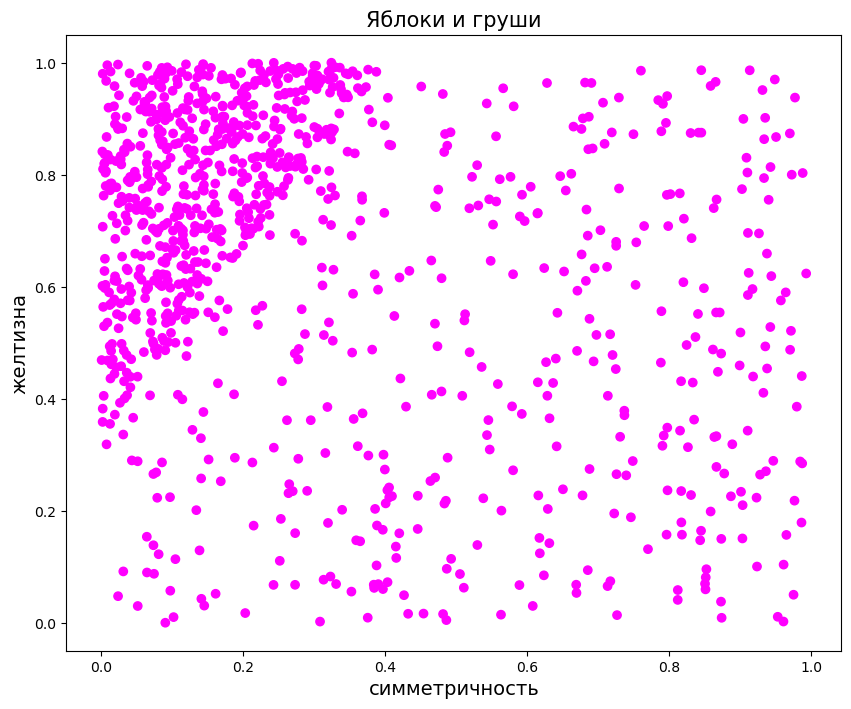

In [6]:
neuro_data = neuron(X)
y2 = neuro_data > 0.5
y2 = y2.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.symmetry, data.yellowness, c=y2, cmap="spring")
plt.title("Яблоки и груши", fontsize=15)
plt.xlabel("симметричность", fontsize=14)
plt.ylabel("желтизна", fontsize=14)
plt.show()

In [7]:
lr = 0.1
n_epochs = 1000
loss_fn = nn.MSELoss(reduction="mean")

## Тестируем оптизимацию при помощи Adam

In [8]:
optimizer = optim.Adam(neuron.parameters(), lr=lr)
train_step = make_train_step(neuron, loss_fn, optimizer)

In [9]:
for epoch in range(n_epochs):
    loss = train_step(X, y)

print(f"Neuron state is {neuron.state_dict()}")
print(f"Loss is {loss:.3}")

Neuron state is OrderedDict([('0.weight', tensor([[ 13.5838, -21.5895]])), ('0.bias', tensor([-3.7710]))])
Loss is 0.0163


### Получили loss = 0.011 за 1000 эпох, результат значительно лучше

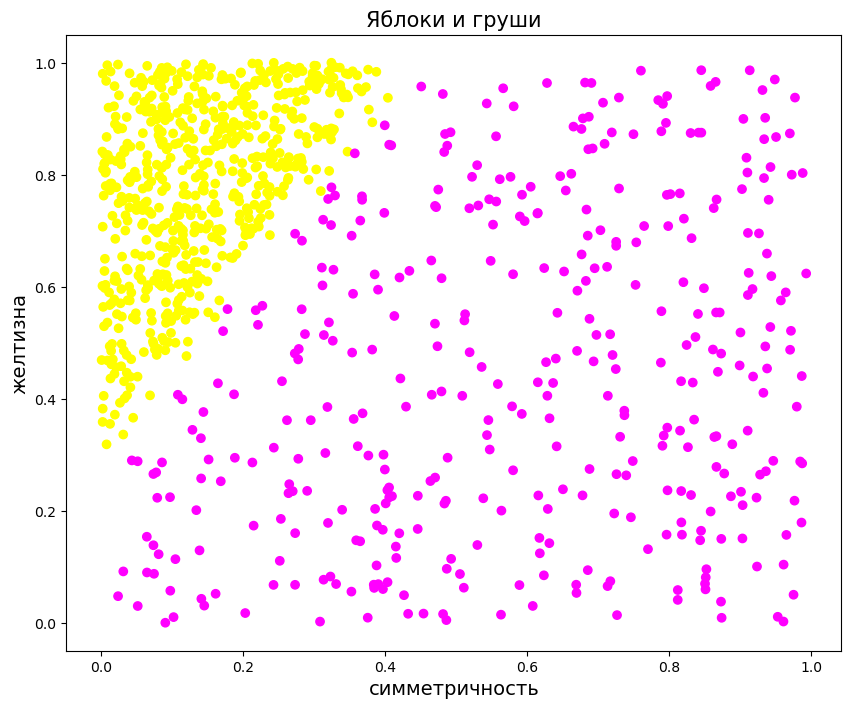

In [10]:
neuro_data = neuron(X)
y2 = neuro_data > 0.5
y2 = y2.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.symmetry, data.yellowness, c=y2, cmap="spring")
plt.title("Яблоки и груши", fontsize=15)
plt.xlabel("симметричность", fontsize=14)
plt.ylabel("желтизна", fontsize=14)
plt.show()

## Тестируем различные функции активации

### Tahn
https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#tanh

In [30]:
neuron_Tanh = nn.Sequential(
    nn.Linear(2, out_features=1),
    nn.Tanh()
)
optimizer = optim.Adam(neuron_Tanh.parameters(), lr=lr)
train_step = make_train_step(neuron_Tanh, loss_fn, optimizer)

for epoch in range(n_epochs):
    loss = train_step(X, y)

print(f"Neuron state is {neuron.state_dict()}")
print(f"Loss is {loss:.3}")

Neuron state is OrderedDict([('0.weight', tensor([[ 13.5838, -21.5895]])), ('0.bias', tensor([-3.7710]))])
Loss is 0.0918


### LeakyReLU
https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU

In [28]:
neuron_LeakyReLU = nn.Sequential(
    nn.Linear(2, out_features=1),
    nn.LeakyReLU(0.1)
)
optimizer = optim.Adam(neuron_LeakyReLU.parameters(), lr=lr)
train_step = make_train_step(neuron_LeakyReLU, loss_fn, optimizer)

for epoch in range(n_epochs):
    loss = train_step(X, y)

print(f"Neuron state is {neuron.state_dict()}")
print(f"Loss is {loss:.3}")

Neuron state is OrderedDict([('0.weight', tensor([[ 13.5838, -21.5895]])), ('0.bias', tensor([-3.7710]))])
Loss is 0.0441


### ReLU
https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#relu

In [26]:
neuron_ReLU = nn.Sequential(
    nn.Linear(2, out_features=1),
    nn.ReLU(0.1)
)
optimizer = optim.Adam(neuron_ReLU.parameters(), lr=lr)
train_step = make_train_step(neuron_ReLU, loss_fn, optimizer)

for epoch in range(n_epochs):
    loss = train_step(X, y)

print(f"Neuron state is {neuron.state_dict()}")
print(f"Loss is {loss:.3}")

Neuron state is OrderedDict([('0.weight', tensor([[ 13.5838, -21.5895]])), ('0.bias', tensor([-3.7710]))])
Loss is 0.0427


### ELU
https://pytorch.org/docs/stable/generated/torch.nn.ELU.html#elu

In [35]:
neuron_ELU = nn.Sequential(
    nn.Linear(2, out_features=1),
    nn.ELU(0.1)
)
optimizer = optim.Adam(neuron_ELU.parameters(), lr=lr)
train_step = make_train_step(neuron_ELU, loss_fn, optimizer)

for epoch in range(n_epochs):
    loss = train_step(X, y)

print(f"Neuron state is {neuron.state_dict()}")
print(f"Loss is {loss:.3}")

Neuron state is OrderedDict([('0.weight', tensor([[ 13.5838, -21.5895]])), ('0.bias', tensor([-3.7710]))])
Loss is 0.0433


## Выводы
Наилучший результат по loss получили, используюя Sigmoid + Adam
Хотя с оптимизацией SGD другие алгоритмы в целом более эффективны

## График зависимости лосса от количества эпох.

In [42]:
lr = 0.1
n_epochs_series = [10, 100, 1000, 10000, 100000]
loss_fn = nn.MSELoss(reduction="mean")

res = []
for n_epochs in n_epochs_series:

    neuron = nn.Sequential(
        nn.Linear(2, out_features=1),
        nn.Sigmoid()
    )
    optimizer = optim.Adam(neuron.parameters(), lr=lr)
    train_step = make_train_step(neuron, loss_fn, optimizer)

    for epoch in range(n_epochs):
        loss = train_step(X, y)
    res.append(loss)

In [50]:
res1 = [round(i.item(), 10) for i in res]
res1

[0.1691630185, 0.0485523157, 0.0163733065, 0.001612368, 9.67e-08]

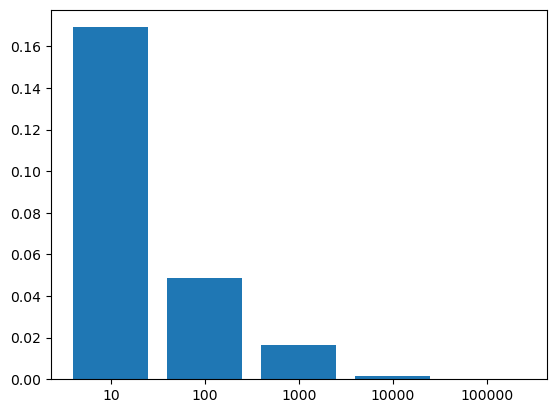

In [54]:
plt.bar(x=list(map(str, n_epochs_series)), height=res1)
plt.show()